# Goodreads Book Reviews Analysis - Numerical Data Exploration

## Project Overview
This project aims to analyze **Goodreads book reviews**, focusing on **1-star ratings** to understand patterns in harsh reviews. The analysis is divided into two parts:
1. **Numerical Data Analysis** (Current Stage) - Examining numerical factors such as star ratings, review counts, and genre distributions.
2. **Natural Language Processing (NLP) Analysis** (Next Stage) - Exploring book descriptions and text reviews to identify sentiment patterns.

## Adding dataset with text reviews

In [ ]:
import pandas as pd
import json
import gzip

chunk_size= 10000
chunks= []

with gzip.open ("./Data/goodreads_reviews_dedup.json.gz", "rt", encoding="utf-8") as f:
    for i, line in enumerate(f): #read line by line
        chunks.append(json.loads(line)) #convert json to stionf dict

    #every chuck line, process data to write csv
        if (i + 1) % chunk_size == 0:
            df_chunk = pd.DataFrame(chunks)
            df_chunk.to_csv("goodreads_reviews", mode="a", index= False, header = (i < chunk_size))
            chunks = []
        
if chunks:
    df_chunk = pd.DataFrame(chunks)
    df_chunk.to_csv("goodreads_reviews", mode ="a", index=False, header=False) 


In [ ]:
df_reviews = pd.read_csv("goodreads_reviews")

In [ ]:
df_reviews.head()

In [ ]:
df_reviews.info()

In [ ]:
df_reviews['book_id'].duplicated().any()

In [ ]:
import pandas as pd
import json
import gzip

chunk_size= 10000
chunks= []

with gzip.open ("./Data/goodreads_books.json.gz", "rt", encoding="utf-8") as f:
    for i, line in enumerate(f): #read line by line
        chunks.append(json.loads(line)) #convert json to stionf dict
         
    #every chuck line, process data to write csv
        if (i + 1) % chunk_size == 0:
            df_chunk = pd.DataFrame(chunks)
            df_chunk.to_csv("goodreads_books", mode="a", index= False, header = (i < chunk_size))
            chunks = []
        
if chunks:
    df_chunk = pd.DataFrame(chunks)
    df_chunk.to_csv("goodreads_books", mode ="a", index=False, header=False) 

In [ ]:
df_books = pd.read_csv("goodreads_books")

In [ ]:
df_books.head(10)

In [ ]:
df_books.info()

In [ ]:
print(df_books.columns)

In [ ]:
df_merged = df_reviews.merge(df_books, on="book_id", how="inner")

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_merged.head(10)

In [ ]:
print(df_merged.columns)

In [ ]:
df_merged=df_merged.drop(columns=['user_id','date_added','read_at','started_at','date_updated','read_at','kindle_asin','work_id','n_comments','asin','similar_books','series','similar_books','publication_month','publication_day','edition_information','is_ebook'])


In [ ]:
df_merged.info()

In [ ]:
df_merged=df_merged.drop(columns=['format', 'num_pages', 'isbn13', 'link', 'title_without_series'])

In [ ]:
df_merged['review_id'].duplicated().any()

In [ ]:
(df_merged['text_reviews_count']== 0).any()

In [ ]:
df_merged[df_merged['text_reviews_count'] == 0]
#?? maybe outdated text review count

In [ ]:
df_merged[df_merged['rating'] == 0]
#reviews that have text but no star rating was left? I am choosing to leave these out of analysis

In [ ]:
df_merged= df_merged[df_merged['rating'].notna() & (df_merged['rating'] !=0)]

In [ ]:
#for this analysis I will only be focusing on english reviews
#removing nonenglish rows and rows with no text in review_text or description. I dont think this will hurt bc the df is so large
df_merged= df_merged.dropna(subset=['review_text','description'])

In [ ]:
df_merged.head()

In [ ]:
#cleaning popular shelves column
print(df_merged['popular_shelves'].iloc[0])

In [ ]:
#seeing which shelves have the highest counts
import ast
from collections import Counter

#function that extracts shelf names from string lists of the shelf dictionaires
def shelf_names(shelves_str):
    shelves_list = ast.literal_eval(shelves_str) #convert the string to a list of dicts
    if isinstance(shelves_list, list):
        return [shelf['name'] for shelf in shelves_list if 'name' in shelf] #extract 'name' value from each dict if it exists
    return []

shelf_counter = Counter()

In [ ]:
#very large operation (takes about 100 minutes to run)
for row in df_merged['popular_shelves'].dropna():
    shelf_counter.update(shelf_names(row))

print(shelf_counter.most_common(30))

In [ ]:
import random

unique_shelves = list(shelf_counter.keys())
print(f"unique names: {len(unique_shelves)}")

In [ ]:
print(shelf_counter.most_common(1000))

In [ ]:
def normalize_shelf(name):
    return name.strip().lower().replace(" ", "-")

In [ ]:
#Filtering shelf names

In [ ]:
#cleaning the author column
print(df_merged['authors'].iloc[0])

In [ ]:
#there is already a language code column but it's not through. Try lang detect to fill in missing
from langdetect import detect
df_merged['dec']

In [ ]:
#checking for final cleaning steps to slim down dataset futher before splitting  then saving to a csv

In [ ]:
#split df into managable chunks for further analysis

In [ ]:
for star in range(0,6):
    df_star = df_merged[df_merged['rating'] == star]
    df_star.to_csv(f"{star}star_reviews.csv")

In [ ]:
import zipfile
import os

csv_files = ["./Data/1star_reviews.csv"]

zip_path = "./Data/1star_reviews.zip"

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in csv_files:
        arcname = os.path.basename(file)
        zipf.write(file,arcname=arcname)

zip_path

In [ ]:
#assigning them to variables then checking size

df_5star = pd.read_csv("./Data/5star_reviews.csv")
df_5star.info()

In [ ]:
df_4star = pd.read_csv("./Data/4star_reviews.csv")
df_4star.info()

In [ ]:
df_3star = pd.read_csv("./Data/3star_reviews.csv")
df_3star.info()

In [ ]:
df_2star = pd.read_csv("./Data/2star_reviews.csv")
df_2star.info()

In [1]:
import pandas as pd
import json
import gzip
import ast
from collections import Counter

In [ ]:
pip install "numpy<2"

In [3]:
df_1star = pd.read_csv("./Data/1star_reviews.csv")
df_1star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419874 entries, 0 to 419873
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          419874 non-null  int64  
 1   book_id             419874 non-null  int64  
 2   review_id           419874 non-null  object 
 3   rating              419874 non-null  int64  
 4   review_text         419874 non-null  object 
 5   n_votes             419874 non-null  int64  
 6   isbn                328665 non-null  object 
 7   text_reviews_count  419874 non-null  float64
 8   country_code        419874 non-null  object 
 9   language_code       340979 non-null  object 
 10  popular_shelves     419874 non-null  object 
 11  average_rating      419874 non-null  float64
 12  description         419874 non-null  object 
 13  authors             419874 non-null  object 
 14  publisher           347484 non-null  object 
 15  publication_year    358879 non-nul

In [4]:
# taking a sample of the smallest rating dataset to test for cleaning
sample_1star= df_1star.sample(10000, random_state=42)

In [5]:
#cleaning popular shelves column
print(sample_1star['popular_shelves'].iloc[0])

[{'count': '587', 'name': 'to-read'}, {'count': '76', 'name': 'romance'}, {'count': '75', 'name': 'diana-palmer'}, {'count': '26', 'name': 'contemporary-romance'}, {'count': '20', 'name': 'currently-reading'}, {'count': '17', 'name': 'harlequin'}, {'count': '14', 'name': 'western'}, {'count': '13', 'name': 'contemporary'}, {'count': '10', 'name': 'long-tall-texans'}, {'count': '10', 'name': 'books-i-own'}, {'count': '9', 'name': 'fiction'}, {'count': '9', 'name': 'cowboy'}, {'count': '8', 'name': 'palmer-diana'}, {'count': '8', 'name': 'series'}, {'count': '7', 'name': 'palmer'}, {'count': '7', 'name': 'harlequin-romance'}, {'count': '6', 'name': 'western-romance'}, {'count': '5', 'name': 'owned'}, {'count': '5', 'name': 'default'}, {'count': '5', 'name': 'my-library'}, {'count': '4', 'name': 'kindle'}, {'count': '4', 'name': 'read-in-2010'}, {'count': '3', 'name': 'audio-books'}, {'count': '3', 'name': '2010-11'}, {'count': '3', 'name': 'harlequin-wishlist'}, {'count': '3', 'name': 'b

In [6]:
#seeing which shelves have the highest counts
#function that extracts shelf names from string lists of the shelf dictionaires
def shelf_names(shelves_str):
    shelves_list = ast.literal_eval(shelves_str) #convert the string to a list of dicts
    if isinstance(shelves_list, list):
        return [shelf['name'] for shelf in shelves_list if 'name' in shelf] #extract 'name' value from each dict if it exists
    return []

shelf_counter = Counter()

In [7]:
#very large operation (takes about 100 minutes to run)
for row in sample_1star['popular_shelves'].dropna():
    shelf_counter.update(shelf_names(row))

print(shelf_counter.most_common(60))

[('to-read', 9929), ('currently-reading', 9297), ('owned', 8457), ('fiction', 8311), ('favorites', 8263), ('books-i-own', 7961), ('kindle', 7382), ('ebook', 7213), ('library', 7085), ('owned-books', 6950), ('to-buy', 6593), ('ebooks', 6318), ('wish-list', 5941), ('default', 5726), ('contemporary', 5486), ('my-books', 5381), ('audiobook', 5368), ('adult', 5238), ('romance', 5224), ('audiobooks', 5077), ('i-own', 4903), ('my-library', 4853), ('did-not-finish', 4748), ('dnf', 4737), ('audio', 4647), ('abandoned', 4567), ('favourites', 4412), ('e-book', 4404), ('series', 4208), ('novels', 4206), ('read-in-2015', 4022), ('own-it', 3976), ('books', 3873), ('book-club', 3829), ('fantasy', 3827), ('e-books', 3779), ('read-in-2016', 3764), ('read-in-2014', 3740), ('adult-fiction', 3735), ('maybe', 3717), ('young-adult', 3559), ('read-in-2013', 3381), ('read-in-2017', 3149), ('mystery', 3113), ('have', 3004), ('novel', 2992), ('reviewed', 2966), ('borrowed', 2906), ('ya', 2884), ('audible', 2854

In [8]:
import random

unique_shelves = list(shelf_counter.keys())
print(f"unique names: {len(unique_shelves)}")

unique names: 92620


In [9]:
import ast

blacklist = [
    # 1. Reading status
    'to-read', 'read-in-2016', 'currently-reading', 'tbr', 'read-2016', 'read-2015', 'read-2014',
    'read-2013', 'read-2012', 'read-2011', 'read-2010', 're-read', 'reread', 'to-reread', 'already-read',
    'read-again', 'read-aloud', 'read-alouds', 'read-fiction', 'read-in-school', 'read-as-a-kid',
    'read-comics', 'read-next', 'read-2009', 'read-in-english',

    # 2. Ownership/location
    'owned', 'my-books', 'library', 'kindle', 'ebooks', 'books-i-own', 'to-buy', 'owned-books',
    'i-own', 'my-library', 'own-it', 'borrowed', 'on-my-shelf', 'books-i-have', 'bookshelf',
    'home-library', 'my-bookshelf', 'own-to-read', 'own-ebook', 'my-ebooks', 'owned-tbr',
    'ebooks-i-own', 'own-kindle', 'owned-not-read', 'owned-but-not-read', 'own-on-kindle',
    'kindle-owned', 'own-unread', 'owned-unread', 'owned-ebook', 'own-a-copy', 'my-kindle-books',
    'owned-kindle', 'own-tbr', 'kindle-library', 'books-owned', 'kindle-to-read', 'not-owned',
    'do-not-own', 'owned-not-read', 'owned-but-not-read', 'own-unread', 'own-a-copy',

    # 3. Format or device
    'audiobook', 'ebook', 'paperback', 'hardcover', 'audiobooks', 'audio', 'e-book', 'e-books',
    'audio-books', 'audio-book', 'audible', 'library-book', 'kindle-books', 'nook', 'on-kindle',
    'netgalley', 'overdrive', 'pdf', 'epub', 'ibooks', 'kobo', 'kindle-unlimited', 'digital',
    'graphic', 'ebook-owned', 'epub', 'e-reader', 'calibre', 'ibooks', 'kobo', 'downloaded',
    'kindle-book', 'ebooks-i-own',

    # 4. Rating/review-based
    '5-stars', 'favorites', 'favourites', 'favorite', 'favorite-books', 'favorite-series',
    'my-favorites', 'favorite-authors', 'favorite-author', 'faves', 'favourite', 'fav',
    'gave-up-on', 'gave-up', 'did-not-finish', 'dnf', 'abandoned', 'unfinished', 'didn-t-finish',
    'couldn-t-finish', 'could-not-finish', 'not-finished', 'not-read', 'never-finished', 'paused',
    'stopped-reading', 'not-for-me', 'nope', 'meh', 'dnf', 'review', 'reviewed',

    # 5. Challenge or year-based
    '2016-reading-challenge', '2017-reading-challenge', '2015-reading-challenge', '2014-read',
    '2015-reads', '2014-reads', '2013-reads', '2012-reads', '2011-reads', '2010-reads', '2016-reads',
    '2015-books', '2014-books', '2013-books', '2012-books', '2017-reads', '2017-books',
    '2017-read', '2017-release', '2017-reading-list', '2017-books-read', 'books-read-in-2016',
    'books-read-in-2015', 'books-read-in-2014', 'books-read-in-2013', 'books-read-in-2012',
    'books-read-in-2017', 'books-read-in-2011', 'books-read-in-2010', 'read-in-2015',
    'read-in-2014', 'read-in-2013', 'read-in-2012', 'read-in-2011', 'read-in-2010', '2016-books',
    '2016-read', '2017-books-read', '2017-books-read', 'books-read-in-2016', '2016-books-read',

    # 6. Meta or personal tags
    'wishlist', 'wish-list', 'book-club', 'bookclub', 'book-club-books', 'book-club-reads',
    'book-group', 'to-re-read', 're-read', 'reread', 'to-reread', 'to-read-owned', 'to-read-own',
    'to-read-fiction', 'to-read-non-fiction', 'to-read-nonfiction', 'to-read-ya', 'to-read-series',
    'to-read-classics', 'to-read-fantasy', 'to-review', 'to-purchase', 'to-be-read', 'to-be-released',
    'to-read-soon', 'to-get', 'want-to-read', 'want-to-buy', 'want', 'need', 'need-to-buy',
    'need-to-get', 'not-interested', 'maybe', 'maybe-read', 'recommendations', 'next', 'next-to-read',
    'next-in-series', 'done', 'shelved', 'my-shelf', 'own-a-copy', 'own-tbr', 'top-tbr', 'not-for-me',
    'considering', 'owned-but-not-read', 'wishlist', 'wishlist', 'owned-to-read'
]


blacklist_words = set(word.lower() for word in blacklist)

In [14]:
genre_mapping = {
    'cowboys': 'cowboy',
    'chick lit': 'chick lit',
    'adult fiction': 'adult fiction',
    'cowboy western': 'cowboy western',
    'genre western': 'western',
    'romantic suspense': 'romantic suspense',
    'action': 'action',
    'series romance': 'romance',
    'genre romance': 'romance',
    'romance modern': 'modern romance',
    'science fiction': 'science fiction',
    'sci fi': 'science fiction',
    'scifi': 'science fiction',
    'post apocalyptic': 'post apocalyptic',
    'sf': 'science fiction',
    'sci fi fantasy': 'science fiction fantasy',
    'dystopia': 'dystopian',
    'apocalyptic': 'apocalyptic',
    'science': 'science',
    'speculative fiction': 'speculative fiction',
    'fantasy sci fi': 'science fiction fantasy',
    'apocalypse': 'apocalyptic',
    'space opera': 'space opera',
    'science fiction fantasy': 'science fiction fantasy',
    'hard sci fi': 'hard science fiction',
    'sff': 'science fiction fantasy',
    'post apocalypse': 'post apocalyptic',
    'sf fantasy': 'science fiction fantasy',
    'sci fi and fantasy': 'science fiction fantasy',
    'hard scifi': 'hard science fiction',
    'sciencefiction': 'science fiction',
    'regency romance': 'regency romance',
    'romance historical': 'historical romance',
    'mf': 'm f',
    'historical romances': 'historical romance',
    'historicals': 'historical',
    'humorous': 'humor',
    'humour': 'humor',
    'humour comedy': 'humor',
    'young adult': 'young adult',
    'ya': 'young adult',
    'fairies': 'fairies',
    'faeries': 'fairies',
    'faerie': 'fairies',
    'fey': 'fae',
    'ya fantasy': 'young adult fantasy',
    'paranormal romance': 'paranormal romance',
    'historical fantasy': 'historical fantasy',
    'historical fic': 'historical fiction',
    'supernatural': 'supernatural',
    'faries': 'fairies',
    'classic lit': 'classic literature',
    'british lit': 'british literature',
    'brit lit': 'british literature',
    'english lit': 'english literature',
    'lit': 'literature',
    'feminist': 'feminism',
    'ya books': 'young adult books',
    'ya fiction': 'young adult fiction',
    'ya': 'young adult',
    'non fiction': 'nonfiction',
    'non fic': 'nonfiction',
    'memoirs': 'memoir',
    'distopian': 'dystopian',
    'ya dystopian': 'young adult dystopian',
    'ya lit': 'young adult literature'
}

In [15]:
genre_mapping.update({
    'women s fiction': 'womens fiction',
    'womens fiction': 'womens fiction', 
    'children s': 'children books',
    'childrens books': 'children books',
    'children s books': 'children books',
    'children': 'children books',
    'childrens': 'children books',
    'kids books': 'children books',
    'kid books': 'children books',
    'general fiction': 'fiction',
    'novels': 'novel',
})

In [21]:
import ast
from collections import defaultdict

# Helper to clean individual shelf/tag names
def clean_name(name):
    return name.lower().replace('-', ' ').replace('_', ' ').strip()

# Parse the shelf string into a list of (name, count)
def extract_shelves(shelves_str):
    try:
        shelves_list = ast.literal_eval(shelves_str)
    except:
        return []

    if isinstance(shelves_list, list):
        return [(clean_name(shelf['name']), int(shelf.get('count', 0)))
                for shelf in shelves_list if 'name' in shelf]
    return []

# Main cleaning pipeline
def apply_cleaning_pipeline(shelves_str, genre_mapping, blacklist_words):
    # Step 1: Extract and clean
    shelves = extract_shelves(shelves_str)

    # Step 2: Map to standardized genres
    mapped = []
    for tag, count in shelves:
        tag_clean = clean_name(tag)
        mapped_tag = genre_mapping.get(tag_clean, tag_clean)
        mapped.append((mapped_tag, count))

    # Step 3: Remove any mapped tag that contains a blacklisted word
    result = []
    for tag, count in mapped:
        if not any(bad_word in tag for bad_word in blacklist_words):
            result.append((tag, count))

    # Step 4: Aggregate repeated tags
    tag_counts = defaultdict(int)
    for tag, count in result:
        tag_counts[tag] += count

    return sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

In [23]:
sample_1star['cleaned_shelves'] = sample_1star['popular_shelves'].apply(
    apply_cleaning_pipeline,
    args=(genre_mapping, blacklist_words)
)

In [24]:
pd.set_option('display.max_colwidth', None)
sample_1star[['cleaned_shelves']].head(20)

,cleaned_shelves
41230,"[(to read, 587), (romance, 79), (diana palmer, 75), (contemporary romance, 26), (currently reading, 20), (harlequin, 17), (western, 16), (contemporary, 13), (cowboy, 12), (long tall texans, 10), (books i own, 10), (fiction, 9), (palmer diana, 8), (series, 8), (palmer, 7), (harlequin romance, 7), (western romance, 6), (default, 5), (read in 2010, 4), (2010 11, 3), (books i have, 3), (adult, 3), (virgin heroine, 3), (april, 3), (harlequim, 2), (storage1, 2), (did not finish, 2), (series in progress, 2), (150 250 pages, 2), (chick lit, 2), (books, 2), (on my shelf, 2), (adult fiction, 2), (cowboy western, 2), (terjemahan, 2), (undecided, 2), (paper back, 2), (not interested, 2), (gramedia, 2), (bought, 2), (romantic suspense, 2), (action, 2), (i own, 2), (small town, 2), (part of a series, 2), (2010 read, 2), (harlequinromance, 2), (2017 read, 1), (meaghan, 1), (mills and boon, 1), (0 contemporary, 1), (seasonal challenge, 1), (best covers, 1), (read in 2015, 1), (harlequins, 1), (books i own paper, 1), (angsty, 1), (on the shelf, 1), (2017 challenge, 1), (series read, 1), (shelf 4 front, 1), (2017 bookriot challenge, 1), (vicky to read, 1), (1999 reads, 1), (2010 reads, 1), (blom check, 1), (primary, 1), (modern romance, 1), (own to read, 1), (long tall texan, 1), (hero grovels, 1), (brooding hero, 1), (long tall texans series bk 34, 1), (harlequin modern romance, 1), (e books, 1), (3 stars, 1)]"
95710,"[(to read, 25568), (science fiction, 4301), (currently reading, 1113), (fiction, 1014), (science fiction fantasy, 326), (post apocalyptic, 240), (dystopian, 209), (apocalyptic, 150), (space, 105), (to buy, 101), (fantasy, 100), (novel, 94), (hard science fiction, 83), (read in 2015, 81), (read in 2016, 79), (science, 73), (speculative fiction, 70), (scifi fantasy, 68), (did not finish, 63), (adult, 57), (to read fiction, 57), (books i own, 54), (space opera, 51), (read 2015, 49), (wish list, 48), (read 2016, 46), (book club, 46), (bill gates, 44), (didn t finish, 43), (adventure, 32), (gave up on, 31), (on hold, 31), (recommended, 31), (read 2017, 30), (read in 2017, 30), (e books, 29), (e book, 28), (survival, 28), (default, 27), (neal stephenson, 27), (to read sci fi, 27), (never finished, 24), (sci fi to read, 24), (couldn t finish, 23), (to read scifi, 23), (epic, 23), (stopped reading, 22), (to get, 22), (literature, 21), (2015 reads, 21), (adult fiction, 21), (standalone, 20), (fiction to read, 20), (fantasy scifi, 20), (english, 20), (speculative, 20), (thriller, 19), (gave up, 18), (signed, 18), (future, 18), (2015 read, 17), (21st century, 17), (near future, 17)]"
142885,"[(currently reading, 247), (romance, 150), (to read, 111), (historical romance, 92), (historical, 81), (historical fiction, 53), (regency, 53), (humor, 38), (fiction, 19), (regency romance, 14), (e book, 13), (comedy, 11), (books i own, 9), (free, 9), (funny, 8), (adult, 8), (freebie, 8), (freebies, 7), (chick lit, 6), (read in 2012, 6), (e books, 6), (read in 2017, 5), (amazon, 5), (own it, 5), (read in 2013, 5), (read in 2016, 4), (england, 4), (read 2015, 4), (wish list, 4), (cross dressing, 4), (guilty pleasures, 4), (m f, 4), (read in 2015, 3), (loved it, 3), (d l carter, 3), (free books, 3), (gender bender, 3), (regency era, 3), (to be read, 3), (fantasy, 3), (i own, 3), (amazon freebies, 3), (friendship, 2), (default, 2), (laugh out loud, 2), (shelfari humor, 2), (2015 challenge, 2), (humorous romance, 2), (period, 2), (friends to lovers, 2), (bookbub, 2), (fun, 2), (misc, 2), (own to read, 2), (fiction humor, 2), (drama, 2), (family, 2), (love story, 2), (first reads, 2)]"
238919,"[(to read, 1075), (young adult, 975), (dystopian, 778), (currently reading, 468), (science fiction, 403), (post apocalyptic, 205), (books i own, 202), (series, 182), (apocalyptic, 152), (survival, 120), (fiction, 109), (teen, 71), (adventure, 61), (young adult fiction, 60), (to buy, 54), (wish list, 52), (fantasy, 48), (read in 2014, 42), (arc, 

In [ ]:
sample_1star.head(40)

In [25]:
# Step 1: Create a cleaned language column but keep NaNs
sample_1star = sample_1star[
    sample_1star['language_code'].isna() |
    sample_1star['language_code'].str.lower().str.contains(r'\ben\b|\beng\b|en-', na=False)
]

In [26]:
sample_1star['language_code'].value_counts(dropna=False)

language_code
eng      5701
NaN      1863
en-US    1150
en-GB     293
en-CA      60
Name: count, dtype: int64

In [27]:
!pip install langdetect

In [28]:
from langdetect import detect
import langdetect

def detect_language(text):
    try:
        return detect(text)
    except langdetect.lang_detect_exception.LangDetectException:
        return "unknown"

# Add 'lang' column to sample_1star
sample_1star['lang'] = sample_1star['review_text'].apply(detect_language)

# Filter for English reviews and assign to df_clean
sample_1star = sample_1star[sample_1star['lang'] == 'en'].reset_index(drop=True)

In [29]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()                            # Lowercase
    text = re.sub(r'<[^>]+>', '', text)            # Remove HTML tags
    text = re.sub(r'\s+', ' ', text)               # Normalize whitespace
    text = re.sub(r'http\S+', '', text)            # Remove URLs
    text = re.sub(r'[^a-z0-9\s.,!?\'"-]', '', text)  # Remove special characters except common punctuation
    text = text.strip()                            # Trim leading/trailing whitespace
    return text

In [30]:
sample_1star['review_clean'] = sample_1star['review_text'].apply(clean_text)
sample_1star['description_clean'] = sample_1star['description'].apply(clean_text)

In [35]:
sample_1star.sample(40)

,Unnamed: 0,book_id,review_id,rating,review_text,n_votes,isbn,text_reviews_count,country_code,language_code,...,publisher,publication_year,url,image_url,ratings_count,title,cleaned_shelves,lang,review_clean,description_clean
2837,5322671,29056083,fe6a535e5c918cdec21816e158059142,1,Update now it's 1.5 because the More I think about it the more angry I get the only thing I by that saved it was scorpius (kinda) \n I'm giving it a 3 because I missed Harry Potter sooo very mush and I liked going back to the world but to be honest like countless people said before me it feels like a fanfiction and a very average one. \n I can't believe that jk is the one writing it doesn't feel like her at all so I'm inclined to believe that her name was put on it just for selling purposes. \n Most of the dialogue felt a little flat and sometimes out of character and the plot don't even get me started . It felt ship and not believable with no real foundation for it from the original books. \n I always thought that the adaptation of the half blood prince was the worst part of the Harry Potter world well this nearly took the gold medal over it the only thing that salvage it is my nostalgia. \n As a my Fangirling buddy said I ll just take it as a fanfiction and erase it from the canon,0,0751565350,36121.0,US,eng,...,"Little, Brown",2016.0,https://www.goodreads.com/book/show/29056083-harry-potter-and-the-cursed-child---parts-one-and-two,https://images.gr-assets.com/books/1470082995m/29056083.jpg,288018.0,"Harry Potter and the Cursed Child - Parts One and Two (Harry Potter, #8)","[(fantasy, 10546), (young adult, 3864), (fiction, 2994), (to read, 2341), (plays, 2332), (books i own, 2324), (read in 2016, 2190), (harry potter, 1701), (magic, 1101), (read 2016, 1059), (series, 932), (children books, 911), (play, 803), (2016 reads, 644), (adventure, 545), (time travel, 489), (drama, 447), (science fiction fantasy, 426), (2016 books, 363), (read in english, 358), (my books, 351), (read in 2017, 345), (english, 330), (j k rowling, 290), (2016 read, 262), (to buy, 260), (2016 reading challenge, 258), (i own, 254), (2016 releases, 247), (theatre, 239), (books read in 2016, 234), (middle grade, 229), (default, 200), (read 2017, 194), (young adult fantasy, 185), (british, 178), (witches, 175), (urban fantasy, 162), (summer 2016, 159), (on my shelf, 156), (friendship, 152), (adult, 147), (own it, 144), (family, 136), (teen, 136), (2016 challenge, 135), (paranormal, 128), (mystery, 128), (books, 127), (kids, 126), (book club, 123), (coming of age, 121), (wish list, 119), (jk rowling, 119), (contemporary, 113), (2017 reads, 113), (england, 111), (novel, 110), (2016 release, 104), (e book, 103), (4 stars, 101), (2017 reading challenge, 95), (young adult fiction, 95), (supernatural, 94), (5 stars, 89), (theater, 89), (hp, 87), (have, 87), (in english, 87), (wizards, 87), (disappointing, 87), (fantasia, 84), (fantasy scifi, 83), (21st century, 82), (3 stars, 81), (scifi fantasy, 81)]",en,update now it's 1.5 because the more i think about it the more angry i get the only thing i by that saved it was scorpius kinda i'm giving it a 3 because i missed harry potter sooo very mush and i liked going back to the world but to be honest like countless people said before me it feels like a fanfiction and a very average one. i can't believe that jk is the one writing it doesn't feel like her at all so i'm inclined to believe that her name was put on it just for selling purposes. most of the dialogue felt a little flat and sometimes out of character and the plot don't even get me started . it felt ship and not believable with no real foundation for it from the original books. i always thought that the adaptation of the half blood prince was the worst part of the harry potter world well this nearly took the gold medal over it the only thing that salvage it is my nostalgia. as a my fangirling buddy said i ll just take it as a fanfiction and erase it from the canon,"the eighth story. ni

In [ ]:
sample_1star.columns

In [ ]:
pip install textblob

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# A look into review text without NLP

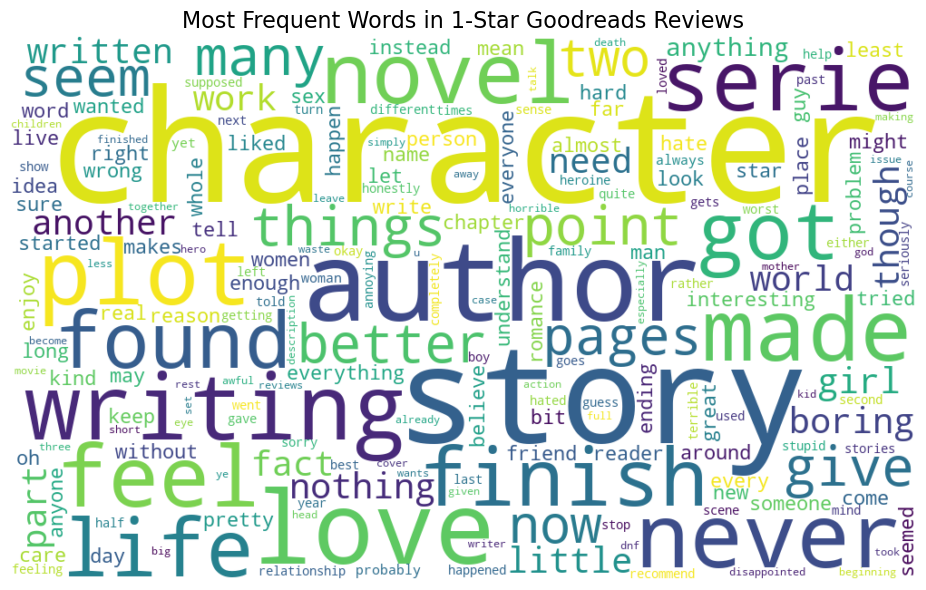

In [40]:
from wordcloud import WordCloud, STOPWORDS

# Combine all review text into one big string
all_reviews = " ".join(review for review in sample_1star['review_clean'].dropna())

# Define stopwords to exclude common words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([ 'book', 'read', 'one', 'really', 'even', 'get', 'know', 'make', 'thing',
    'think', 'way', 'page', 
     'time','would', 'could', 'like', 'well', 'just', 'books',
    'say', 'thought', 'felt', 'want', 'back', 'reading', 'see', 'go', 'going',
    'take', 'something', 'much', 'still', 'good', 'bad', 'end', 'start',
    'main', 'people', 'done', 'felt', 'lot', 'actually', 'put', 'will', 'first', 'use',
    'maybe', 'find', 'say', 'said', 'try', 'trying', 'readers', 'review','books', 'reading', 'one', 'like'
])  

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      stopwords=custom_stopwords, max_words=200).generate(all_reviews)

# Plot it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in 1-Star Goodreads Reviews", fontsize=16)
plt.tight_layout()
plt.show()

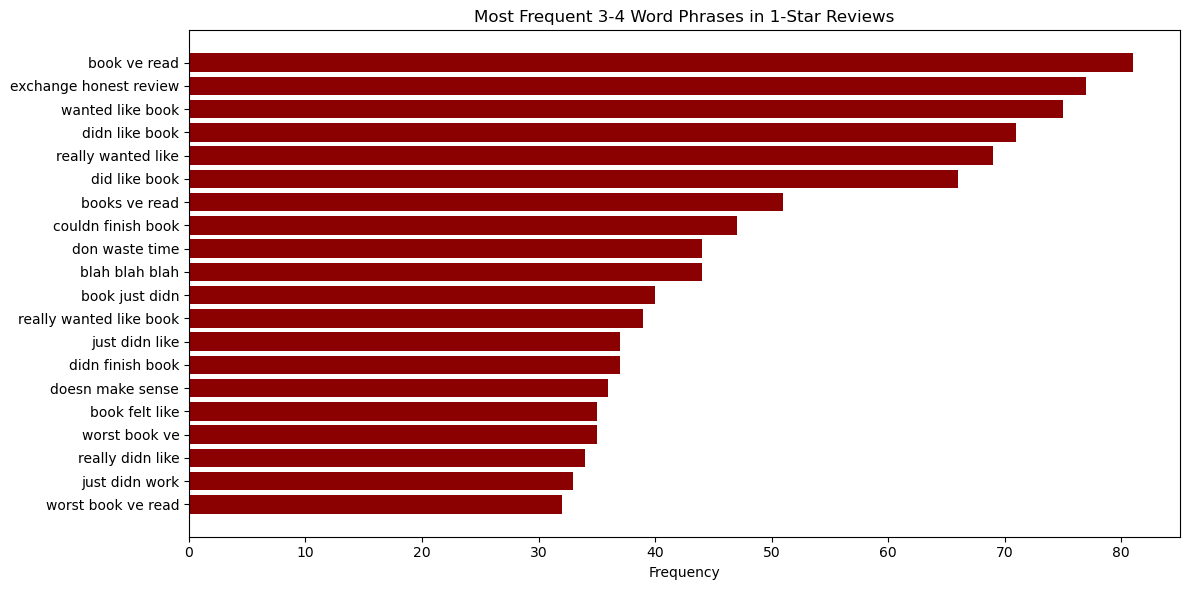

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Use bigrams and trigrams
vectorizer = CountVectorizer(ngram_range=(3, 4), stop_words='english', max_features=100)
X = vectorizer.fit_transform(sample_1star['review_clean'].dropna())

# Sum the frequencies
sum_words = X.sum(axis=0)
phrases_freq = [(phrase, sum_words[0, idx]) for phrase, idx in vectorizer.vocabulary_.items()]
phrases_freq = sorted(phrases_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
ngram_df = pd.DataFrame(phrases_freq, columns=['Phrase', 'Frequency'])

# Display top results
plt.figure(figsize=(12,6))
plt.barh(ngram_df['Phrase'][:20][::-1], ngram_df['Frequency'][:20][::-1], color='darkred')
plt.title('Most Frequent 3-4 Word Phrases in 1-Star Reviews')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

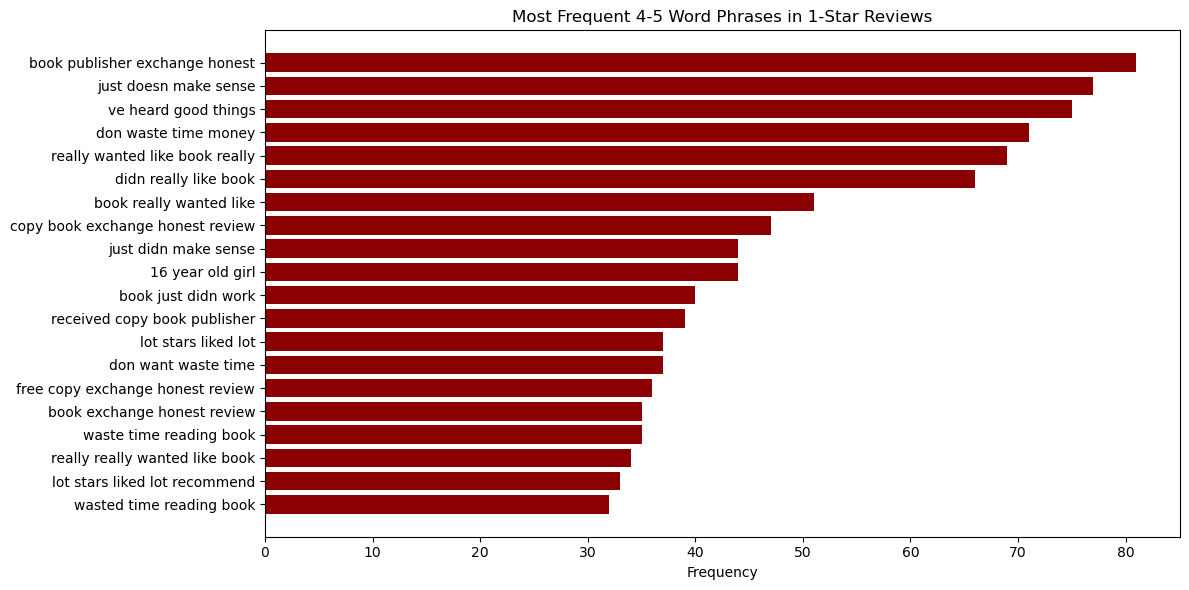

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Use bigrams and trigrams
vectorizer2 = CountVectorizer(ngram_range=(4, 5), stop_words='english', max_features=100)
X_2 = vectorizer2.fit_transform(sample_1star['review_clean'].dropna())

# Sum the frequencies
sum_words2 = X_2.sum(axis=0)
phrases_freq2 = [(phrase, sum_words[0, idx]) for phrase, idx in vectorizer2.vocabulary_.items()]
phrases_freq2 = sorted(phrases_freq2, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
ngram2_df = pd.DataFrame(phrases_freq2, columns=['Phrase', 'Frequency'])

# Display top results
plt.figure(figsize=(12,6))
plt.barh(ngram2_df['Phrase'][:20][::-1], ngram2_df['Frequency'][:20][::-1], color='darkred')
plt.title('Most Frequent 4-5 Word Phrases in 1-Star Reviews')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
ngram2_df.head(20)

In [52]:
# Theme mapping dictionary: theme → list of indicative phrases/keywords
complaint_themes = {
    'Character Issues': [
        'main character', 'character development', 'year old', 'immature', 'annoying', 'love interest',
        'unlikable', 'flat character', 'cardboard cutout', 'inconsistent character',
        'poorly developed', 'shallow', 'unlikeable', 'irritating', 'stupid character',
        'weak character', 'flawed character', 'sympathy for', 'no connection with',
        'motivations unclear', 'acted out of character', 'forced relationship',
        'insta-love', 'toxic relationship', 'protagonist', 'antagonist',
        'side character', 'underdeveloped characters', 'one-dimensional',
        'contrived motivations', 'unbelievable actions', 'lack of depth',
        'superficial', 'self-absorbed', 'whiny', 'passive', 'aggressive',
        'jerk', 'bitch', 'mary sue', 'gary stu', 'author insert',
        'wish fulfillment character', 'unearned development',
        'rushed character arc', 'stagnant character', 'rely on stereotypes'
    ],
    'Plot/Structure': [
        'storyline', 'plot', 'spoiler alert', 'twist', 'didn make sense', 'nothing happened',
        'predictable', 'rushed ending', 'slow burn', 'pacing issues', 'convoluted plot',
        'plot holes', 'deus ex machina', 'uneven pacing', 'anticlimactic', 'pointless subplot',
        'disjointed', 'rambling', 'contrived', 'repetitive plot points', 'no resolution',
        'weak plot', 'thin plot', 'overly complicated', 'underdeveloped plot',
        'too much exposition', 'info dump', 'lack of focus', 'meandering',
        'circular narrative', 'incoherent', 'illogical', 'unrealistic plot',
        'convenient coincidences', 'forced conflict', 'lack of stakes',
        'unnecessary scenes', 'padding', 'false climax', 'unsatisfying ending',
        'cliffhanger with no payoff', 'sequel baiting', 'felt incomplete'
    ],
    'Writing Style': [
        'writing style', 'bad writing', 'purple prose', 'repetitive', 'boring', 'poorly written',
        'clunky prose', 'awkward phrasing', 'stilted dialogue', 'unnatural dialogue',
        'telling not showing', 'over descriptive', 'underdeveloped', 'simplistic writing',
        'pretentious writing', 'amateurish', 'grammatical errors', 'typos', 'editing issues',
        'poor sentence structure', 'weak vocabulary', 'monotonous', 'flow issues',
        'choppy', 'dense writing', 'impenetrable', 'overuse of adjectives',
        'clichés', 'hackneyed', 'trite', 'melodramatic', 'overwrought',
        'infodumping through dialogue', 'dialogue felt forced',
        'internal monologue overuse', 'head hopping', 'inconsistent tense'
    ],
    'Engagement': [
        'couldn finish', 'waste time', 'feel like', 'just didn', 'didn like', 'slow', 'dragged',
        'lost interest', 'tedious', 'struggled to get through', 'hard to follow',
        'unengaging', 'dull', 'plodding', 'sleep-inducing', 'wish i hadn read',
        'skimming', 'couldn\'t connect', 'no emotional impact', 'didn care about',
        'wanted it to end', 'a chore to read', 'painful to read', 'eyes glazed over',
        'mind wandered', 'checked page count constantly', 'felt like a slog',
        'momentum stalled', 'pacing was off', 'never invested', 'no suspense',
        'lacked excitement', 'failed to captivate'
    ],
    'Expectations vs Reality': [
        'like book', 'expected', 'thought would', 'overhyped',
        'not what i expected', 'misleading description', 'different from summary',
        'disappointed', 'underwhelming', 'fell flat', 'not as good as', 'wasted potential',
        'false advertising', 'bait and switch', 'promised more than delivered',
        'didn live up to the hype', 'genre wasn\'t what i thought',
        'cover was misleading', 'title was misleading', 'blurb was inaccurate',
        'reviews were misleading', 'fanbase is delusional'
    ],
    'Offensive Content': [
        'offensive', 'problematic', 'sexist', 'racist', 'abuse', 'trigger',
        'misogynistic', 'homophobic', 'ableist', 'culturally insensitive',
        'gory', 'disturbing', 'gratuitous violence', 'sexual assault',
        'animal cruelty', 'hate speech', 'stereotypes', 'colorism', 'fatphobia',
        'victim blaming', 'glorification of violence', 'romanticizing abuse',
        'toxic masculinity', 'white savior trope', 'bury your gays trope',
        'fridging', 'rape as plot device', 'unnecessary graphic detail'
    ],
    'Genre Mismatch': [
        'not romance', 'not fantasy', 'genre', 'more thriller than',
        'felt like', 'marketed as', 'supposed to be', 'wrong genre',
        'elements of', 'blended genres poorly', 'not enough',
        'too much [genre element]', 'this isn\'t [genre]', 'where\'s the',
        'misleading genre tag', 'didn fit the category', 'cross-genre failure',
        'felt like a different genre entirely', 'no present'
    ]
}

In [54]:
def assign_themes(review_text, theme_map):
    review_text = review_text.lower()
    matched_themes = []

    for theme, keywords in theme_map.items():
        if any(kw in review_text for kw in keywords):
            matched_themes.append(theme)

    return matched_themes if matched_themes else ['Uncategorized']

In [56]:
# Apply the theme assignment to your cleaned reviews
sample_1star['complaint_themes'] = sample_1star['review_clean'].apply(
    lambda x: assign_themes(x, complaint_themes)
)

In [58]:
from collections import Counter
from itertools import chain

# Flatten list of themes and count
theme_counts = Counter(chain.from_iterable(sample_1star['complaint_themes']))
print(theme_counts.most_common())

[('Uncategorized', 3789), ('Plot/Structure', 1904), ('Character Issues', 1772), ('Writing Style', 1389), ('Engagement', 1239), ('Genre Mismatch', 768), ('Expectations vs Reality', 674), ('Offensive Content', 475)]


In [60]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.stem import WordNetLemmatizer

# Assuming your DataFrame is named 'sample_1star'
uncategorized_df = sample_1star[sample_1star['complaint_themes'].apply(lambda x: 'Uncategorized' in x)].copy()
uncategorized_reviews = uncategorized_df['review_clean'].dropna().tolist()

# 1. Define Stopwords (using your combined list)
nltk_stopwords = set(stopwords.words('english'))
wordcloud_stopwords = set(STOPWORDS)
custom_stopwords = set([
    'book', 'read', 'one', 'really', 'even', 'get', 'know', 'make', 'thing',
    'think', 'way', 'page', 'time', 'would', 'could', 'like', 'well', 'just', 'books',
    'say', 'thought', 'felt', 'want', 'back', 'reading', 'see', 'go', 'going',
    'take', 'something', 'much', 'still', 'good', 'bad', 'end', 'start',
    'main', 'people', 'done', 'felt', 'lot', 'actually', 'put', 'will', 'first', 'use',
    'maybe', 'find', 'say', 'said', 'try', 'trying', 'readers', 'review'
])
combined_stopwords_set = nltk_stopwords.union(wordcloud_stopwords).union(custom_stopwords)

# 2. Lemmatization and Stopword Removal for Uncategorized Reviews
lemmatizer = WordNetLemmatizer()
processed_uncategorized_reviews = []
for review in uncategorized_reviews:
    tokens = word_tokenize(review.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_tokens = [token for token in lemmatized_tokens if token not in combined_stopwords_set]
    processed_uncategorized_reviews.append(" ".join(processed_tokens))

# 3. Feature Extraction with TF-IDF for Uncategorized Reviews
tfidf_vectorizer_uncat = TfidfVectorizer(stop_words=list(combined_stopwords_set),
                                        ngram_range=(1, 3),
                                        max_df=0.90,
                                        min_df=2)
tfidf_matrix_uncat = tfidf_vectorizer_uncat.fit_transform(processed_uncategorized_reviews)
feature_names_uncat = tfidf_vectorizer_uncat.get_feature_names_out()

# 4. Train the NMF Model for Uncategorized Reviews
num_topics_uncat = 7  # You can experiment with the number of topics for the uncategorized data
nmf_model_uncat = NMF(n_components=num_topics_uncat, random_state=42, max_iter=300)
nmf_model_uncat.fit(tfidf_matrix_uncat)

# 5. Analyze the Topics for Uncategorized Reviews
print("\nNMF Topics for Uncategorized Reviews:")
for topic_idx, topic in enumerate(nmf_model_uncat.components_):
    top_words_indices = topic.argsort()[:-21:-1]
    top_words = [feature_names_uncat[i] for i in top_words_indices]
    print(f"Uncategorized Topic {topic_idx + 1}: {' '.join(top_words)}")

# 6. Get Topic Assignments for Uncategorized Reviews (Optional)
doc_topic_matrix_uncat = nmf_model_uncat.transform(tfidf_matrix_uncat)
dominant_topics_uncat = [row.argmax() + 1 for row in doc_topic_matrix_uncat]

# 7. Add NMF Topic Assignments to the Uncategorized DataFrame (Optional)
uncategorized_df['nmf_topic_uncat'] = pd.Series(dominant_topics_uncat, index=uncategorized_df.index[:len(dominant_topics_uncat)])

# Merge the NMF topic assignments back into the original DataFrame
sample_1star = pd.merge(sample_1star, uncategorized_df[['review_id', 'nmf_topic_uncat']], on='review_id', how='left')

print("\nDataFrame with NMF Topic Labels for Uncategorized (First 10):")
print(sample_1star[['review_clean', 'complaint_themes', 'nmf_topic_uncat']].head(10))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['let'] not in stop_words.
  warnings.warn(



NMF Topics for Uncategorized Reviews:
Uncategorized Topic 1: story character author ca never ha star series doe give love writing many terrible better life got made short chapter
Uncategorized Topic 2: finish ca finish finish wa gave ca chapter wa finish bothered finish got started bothered enjoy tried club struggled finish plan started finish force saying bored
Uncategorized Topic 3: hated ugh school school hated sorry reason enough finish hated everything ugh hated hated wa disappointment finished absolutely hated high school hated remember high school hated character feel stupid
Uncategorized Topic 4: wa wa wa awful written wa written bored finish wa wa awful wa terrible story wa writing wa free ending impressed wa better wa bored hard enjoyed better wa horrible
Uncategorized Topic 5: dnf ugh gave bored dnf wa come fuck 50 anymore beginning twilight thanks dnf 30 unrealistic dnf tried dnf ed 60 connect ed tried
Uncategorized Topic 6: tea cup tea cup wa cup tea wa cup definitely cup

In [62]:
complaint_themes_updated = {
    'Character Issues': [
        'main character', 'character development', 'year old', 'immature', 'annoying', 'love interest',
        'unlikable', 'flat character', 'cardboard cutout', 'inconsistent character',
        'poorly developed', 'shallow', 'unlikeable', 'irritating', 'stupid character',
        'weak character', 'flawed character', 'sympathy for', 'no connection with',
        'motivations unclear', 'acted out of character', 'forced relationship',
        'insta-love', 'toxic relationship', 'protagonist', 'antagonist',
        'side character', 'underdeveloped characters', 'one-dimensional',
        'contrived motivations', 'unbelievable actions', 'lack of depth',
        'superficial', 'self-absorbed', 'whiny', 'passive', 'aggressive',
        'jerk', 'bitch', 'mary sue', 'gary stu', 'author insert',
        'wish fulfillment character', 'unearned development',
        'rushed character arc', 'stagnant character', 'rely on stereotypes',
        'stupid', 'hate'  # Added from Strong Negative Sentiment
    ],
    'Plot/Structure': [
        'storyline', 'plot', 'spoiler alert', 'twist', 'didn make sense', 'nothing happened',
        'predictable', 'rushed ending', 'slow burn', 'pacing issues', 'convoluted plot',
        'plot holes', 'deus ex machina', 'uneven pacing', 'anticlimactic', 'pointless subplot',
        'disjointed', 'rambling', 'contrived', 'repetitive plot points', 'no resolution',
        'weak plot', 'thin plot', 'overly complicated', 'underdeveloped plot',
        'too much exposition', 'info dump', 'lack of focus', 'meandering',
        'circular narrative', 'incoherent', 'illogical', 'unrealistic plot',
        'convenient coincidences', 'forced conflict', 'lack of stakes',
        'unnecessary scenes', 'padding', 'false climax', 'unsatisfying ending',
        'cliffhanger with no payoff', 'sequel baiting', 'felt incomplete',
        'story' # Added from Uncategorized Topic 1 and 4
    ],
    'Writing Style': [
        'writing style', 'bad writing', 'purple prose', 'repetitive', 'boring', 'poorly written',
        'clunky prose', 'awkward phrasing', 'stilted dialogue', 'unnatural dialogue',
        'telling not showing', 'over descriptive', 'underdeveloped', 'simplistic writing',
        'pretentious writing', 'amateurish', 'grammatical errors', 'typos', 'editing issues',
        'poor sentence structure', 'weak vocabulary', 'monotonous', 'flow issues',
        'choppy', 'dense writing', 'impenetrable', 'overuse of adjectives',
        'clichés', 'hackneyed', 'trite', 'melodramatic', 'overwrought',
        'infodumping through dialogue', 'dialogue felt forced',
        'internal monologue overuse', 'head hopping', 'inconsistent tense',
        'written' # Added from Uncategorized Topic 4
    ],
    'Engagement': [
        'couldn finish', 'waste time', 'feel like', 'just didn', 'didn like', 'slow', 'dragged',
        'lost interest', 'tedious', 'struggled to get through', 'hard to follow',
        'unengaging', 'dull', 'plodding', 'sleep-inducing', 'wish i hadn read',
        'skimming', 'couldn\'t connect', 'no emotional impact', 'didn care about',
        'wanted it to end', 'a chore to read', 'painful to read', 'eyes glazed over',
        'mind wandered', 'checked page count constantly', 'felt like a slog',
        'momentum stalled', 'pacing was off', 'never invested', 'no suspense',
        'lacked excitement', 'failed to captivate',
        'couldn\'t continue', 'gave up', 'stopped reading', 'dnf', 'did not finish',
        'bored', 'finish', 'disappointment', 'wa' # Added from NMF Topics
    ],
    'Expectations vs Reality': [
        'like book', 'expected', 'thought would', 'overhyped',
        'not what i expected', 'misleading description', 'different from summary',
        'disappointed', 'underwhelming', 'fell flat', 'not as good as', 'wasted potential',
        'false advertising', 'bait and switch', 'promised more than delivered',
        'didn live up to the hype', 'genre wasn\'t what i thought',
        'cover was misleading', 'title was misleading', 'blurb was inaccurate',
        'reviews were misleading', 'fanbase is delusional',
        'waste of time', 'waste of money', 'didn\'t feel worth it', 'awful', 'terrible' # Added from NMF Topics
    ],
    'Offensive Content': [
        'offensive', 'problematic', 'sexist', 'racist', 'abuse', 'trigger',
        'misogynistic', 'homophobic', 'ableist', 'culturally insensitive',
        'gory', 'disturbing', 'gratuitous violence', 'sexual assault',
        'animal cruelty', 'hate speech', 'stereotypes', 'colorism', 'fatphobia',
        'victim blaming', 'glorification of violence', 'romanticizing abuse',
        'toxic masculinity', 'white savior trope', 'bury your gays trope',
        'fridging', 'rape as plot device', 'unnecessary graphic detail'
    ],
    'Genre Mismatch': [
        'not romance', 'not fantasy', 'genre', 'more thriller than',
        'felt like', 'marketed as', 'supposed to be', 'wrong genre',
        'elements of', 'blended genres poorly', 'not enough',
        'too much [genre element]', 'this isn\'t [genre]', 'where\'s the',
        'misleading genre tag', 'didn fit the category', 'cross-genre failure',
        'felt like a different genre entirely', 'no present'
    ]
}

In [70]:
def assign_themes_updated(review_text, theme_map):
    review_text = review_text.lower()
    matched_themes = []

    for theme, keywords in theme_map.items():
        if any(kw in review_text for kw in keywords):
            matched_themes.append(theme)

    return matched_themes if matched_themes else ['Uncategorized']

In [72]:
# Apply the updated theme assignment and store in the correct column
sample_1star['complaint_themes_updated'] = sample_1star['review_clean'].apply(
    lambda x: assign_themes_updated(x, complaint_themes_updated)
)

from collections import Counter
from itertools import chain

# Flatten list of themes and count the updated themes
theme_counts_updated = Counter(chain.from_iterable(sample_1star['complaint_themes_updated']))
print(theme_counts_updated.most_common())

print("\nDataFrame with Updated Complaint Themes (First 10):")
print(sample_1star[['review_clean', 'complaint_themes', 'complaint_themes_updated']].head(10))

[('Engagement', 6596), ('Plot/Structure', 3420), ('Character Issues', 2524), ('Writing Style', 1972), ('Expectations vs Reality', 1414), ('Uncategorized', 1059), ('Genre Mismatch', 768), ('Offensive Content', 475)]

DataFrame with Updated Complaint Themes (First 10):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

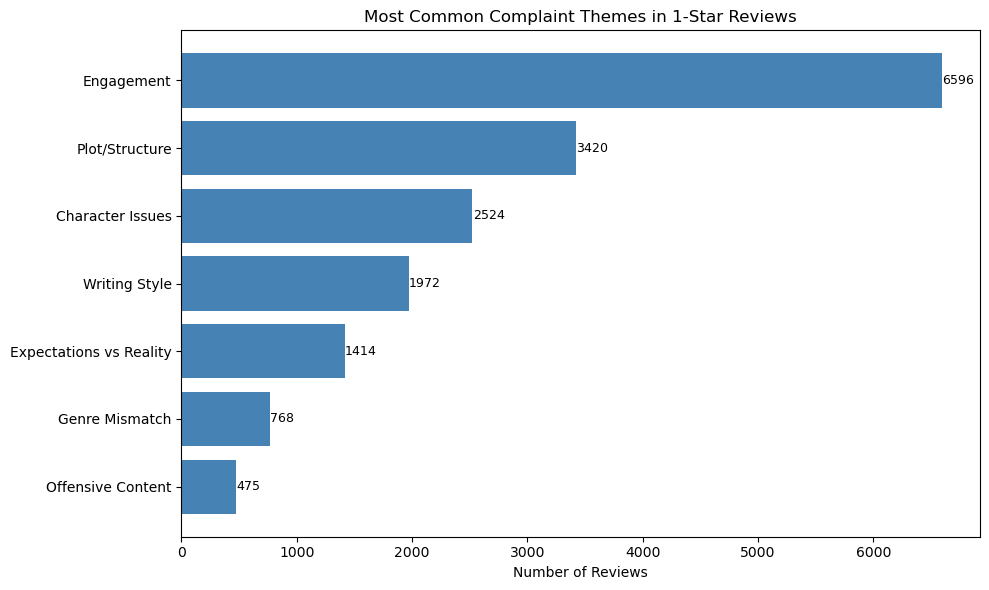

In [74]:
# Step 1: Filter out 'Uncategorized'
filtered_theme_counts = {k: v for k, v in theme_counts_updated.items() if k.lower() != 'uncategorized'}

# Step 2: Sort and split into labels and values
top_themes = sorted(filtered_theme_counts.items(), key=lambda x: x[1], reverse=True)
labels, counts = zip(*top_themes)

# Step 3: Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, counts, color='steelblue')  

plt.xlabel("Number of Reviews")
plt.title("Most Common Complaint Themes in 1-Star Reviews")
plt.gca().invert_yaxis()  # Show most frequent at the top

# Step 4: Add count labels next to bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2,
             str(count), va='center', fontsize=9)

plt.tight_layout()
plt.show()

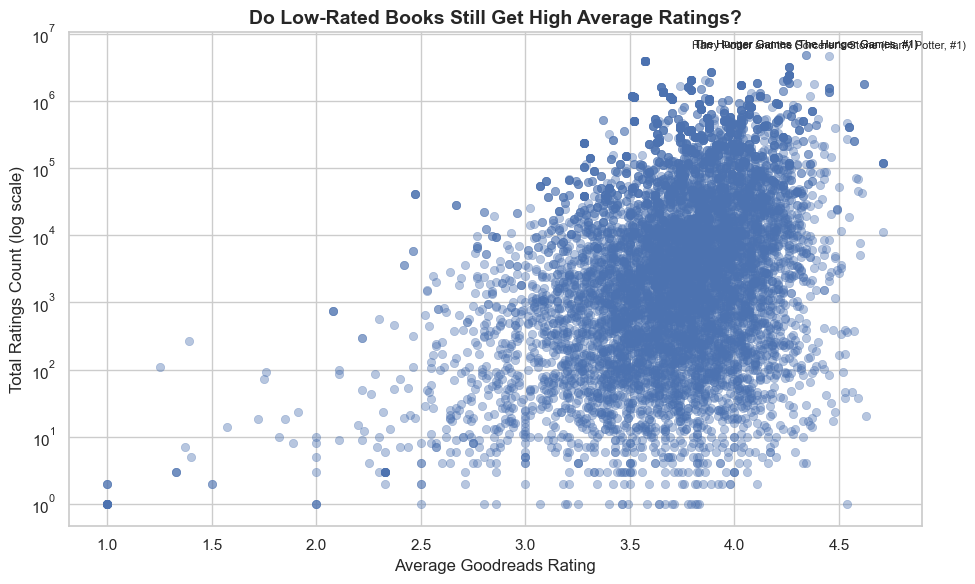

In [76]:
# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot with log scale to handle skewed rating counts
sns.scatterplot(
    data=sample_1star,
    x='average_rating',
    y='ratings_count',
    alpha=0.4,
    edgecolor=None
)

# Use log scale for y-axis to reduce skew
plt.yscale('log')

# Add titles and labels
plt.title("Do Low-Rated Books Still Get High Average Ratings?", fontsize=14, fontweight='bold')
plt.xlabel("Average Goodreads Rating", fontsize=12)
plt.ylabel("Total Ratings Count (log scale)", fontsize=12)

# Annotate a few extreme cases (optional)
top_books = sample_1star.nlargest(3, 'ratings_count')
for _, row in top_books.iterrows():
    plt.annotate(row['title'], (row['average_rating'], row['ratings_count']),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [82]:
# Create a new column with the first complaint theme (or 'Uncategorized')

sample_1star['top_theme'] = sample_1star['complaint_themes_updated'].apply(lambda x: x[0] if isinstance(x, list) and x else 'Uncategorized'

)

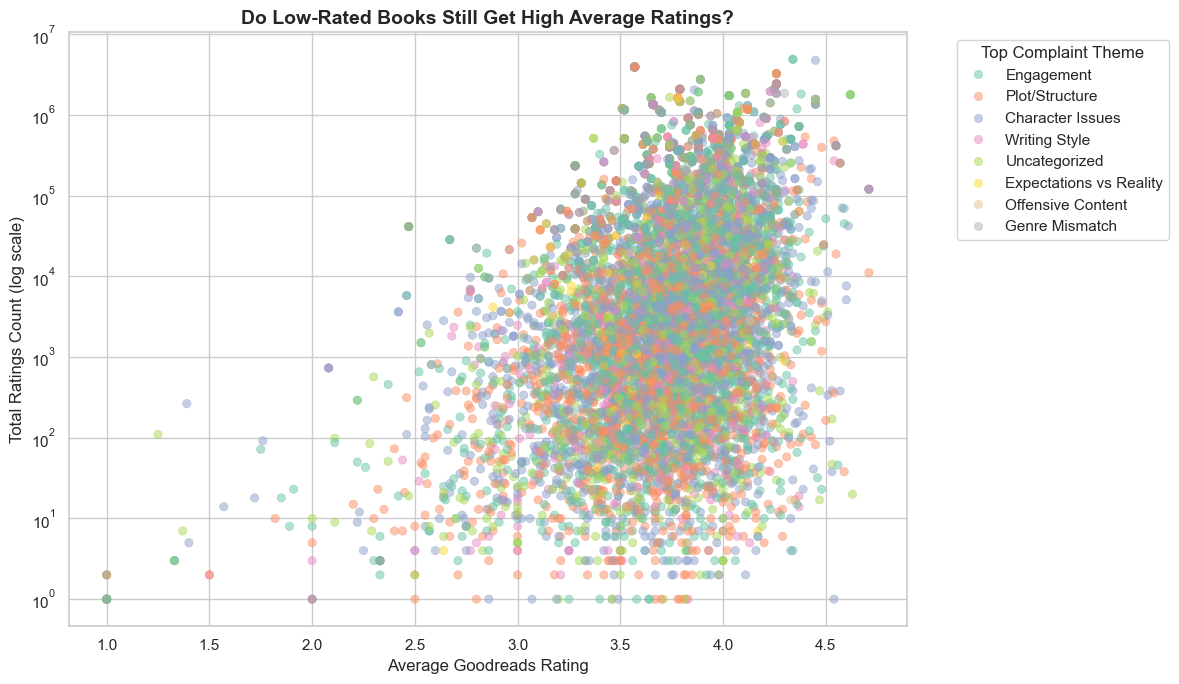

In [84]:
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=sample_1star,
    x='average_rating',
    y='ratings_count',
    hue='top_theme',       # now a string, not a list
    palette='Set2',
    alpha=0.5,
    edgecolor=None
)

plt.yscale('log')
plt.title("Do Low-Rated Books Still Get High Average Ratings?", fontsize=14, fontweight='bold')
plt.xlabel("Average Goodreads Rating")
plt.ylabel("Total Ratings Count (log scale)")
plt.legend(title="Top Complaint Theme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

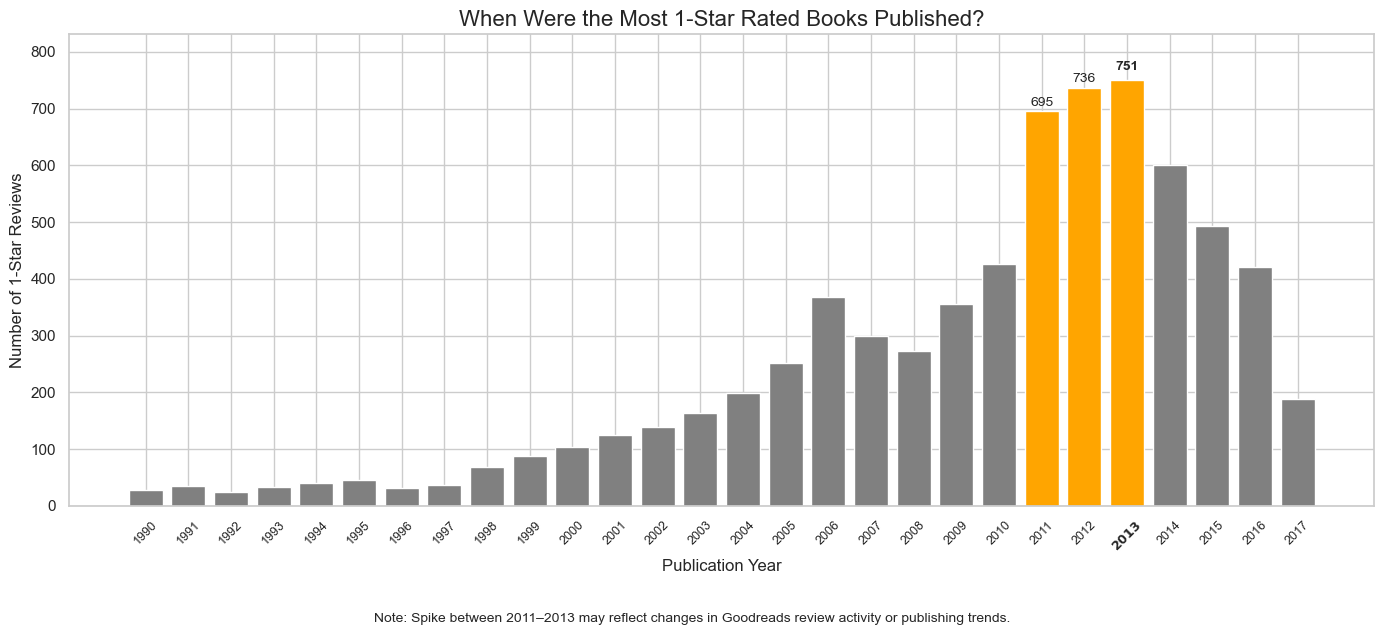

In [86]:
# Get filtered year counts
sample_1star_clean = sample_1star[(sample_1star['publication_year'] >= 1990) & 
                                  (sample_1star['publication_year'] <= 2018)]

# Generate a complete index from 1990–2020 (so every year is shown)
year_range = list(range(1990, 2018))

# Count and reindex to include all years
year_counts = sample_1star_clean['publication_year'].value_counts().sort_index()
year_counts = year_counts.reindex(year_range, fill_value=0)

# --- STEP 2: Plot the Data ---
highlight_years = [2011, 2012, 2013]
colors = ['orange' if year in highlight_years else 'gray' for year in year_counts.index]

fig, ax = plt.subplots(figsize=(14, 6))

bars = ax.bar(year_counts.index, year_counts.values, color=colors)

# Add exact labels for 2011–2013 just above bars (except 2013, which we'll bold separately)
for bar in bars:
    year = int(bar.get_x() + bar.get_width() / 2)
    height = bar.get_height()
    if year in highlight_years and year != 2013:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)
# Axis settings
ax.set_title("When Were the Most 1-Star Rated Books Published?", fontsize=16)
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of 1-Star Reviews")
ax.set_xticks(year_range)
# Bold the label for 2013
xtick_labels = []
for year in year_range:
    if year == 2013:
        xtick_labels.append(f'$\\bf{{{year}}}$')  # LaTeX bold
    else:
        xtick_labels.append(str(year))

ax.set_xticklabels(xtick_labels, rotation=45, fontsize=9)

# Highlight 2013 value in bold above the bar
highlight_year = 2013
highlight_value = year_counts[highlight_year]

ax.annotate(f'{highlight_value}',
            xy=(highlight_year, highlight_value),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold')  # Make the label bold

# Add padding above the tallest bar
ax.set_ylim(0, year_counts.max() + 80)

# Add a footnote
plt.figtext(0.5, -0.05,
            "Note: Spike between 2011–2013 may reflect changes in Goodreads review activity or publishing trends.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
sample_1star.head()

# A look into review text with nlp

In [ ]:
#okay I do want to go futher with k clustering and training a machine to map review to catergory type but ill do that later

In [ ]:
import tensorflow as tf
import keybert
import gensim

In [ ]:
pip install tf-keras

In [ ]:
pip install transformers==4.41.2

In [ ]:
import numpy as np
print(np.__version__)

# A look into shelves

In [ ]:
# Flatten and count
shelf_counts = Counter(chain.from_iterable(
    [shelf for shelf, _ in row] for row in sample_1star['cleaned_shelves']
))

# Get top N shelves
top_shelves = shelf_counts.most_common(20)
shelf_names, counts = zip(*top_shelves)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.barh(shelf_names, counts, color='mediumseagreen')
plt.xlabel("Number of Reviews")
plt.title("Most Common Shelves in 1-Star Reviews")
plt.gca().invert_yaxis()

# Add labels
for bar, count in zip(bars, counts):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(count), va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
print(top_shelves)

You’re training a model to map messy shelf labels (inputs) to clean genre categories (targets).

You could even combine rule-based + machine-learning predictions:
	•	Use your manual genre_mapping when available.
	•	Use the model when the shelf isn’t in your mapping.

# A look into book description

In [ ]:
# Combine all descriptions
all_descriptions = ' '.join(sample_1star['description_clean'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      max_words=100, colormap='viridis').generate(all_descriptions)

# Display it
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Book Descriptions', fontsize=16)
plt.show()

## sentiment analysis

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    if pd.isnull(text) or not isinstance(text, str) or text.strip() == "":
        return None
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Returns a float from -1 (negative) to 1 (positive)

In [ ]:
sample_1star['desc_sentiment'] = sample_1star['description_clean'].apply(get_sentiment)
sample_1star['review_sentiment'] = sample_1star['review_clean'].apply(get_sentiment)

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(sample_1star['review_sentiment'], bins=30, kde=True, color='tomato')
plt.title("Sentiment Distribution of 1-Star Reviews")
plt.xlabel("Review Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(0, linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(sample_1star['desc_sentiment'], bins=30, kde=True, color='steelblue')
plt.title("Sentiment Distribution of Book Descriptions")
plt.xlabel("Description Sentiment Score")
plt.ylabel("Frequency")
plt.axvline(0, linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Define sentiment agreement/contradiction
def sentiment_relationship(row):
    if row['desc_sentiment'] >= 0 and row['review_sentiment'] < 0:
        return 'Positive Blurb / Negative Review'
    elif row['desc_sentiment'] < 0 and row['review_sentiment'] >= 0:
        return 'Negative Blurb / Positive Review'
    elif row['desc_sentiment'] >= 0 and row['review_sentiment'] >= 0:
        return 'Both Positive'
    else:
        return 'Both Negative'

# Apply this relationship to the DataFrame
sample_1star['sentiment_relation'] = sample_1star.apply(sentiment_relationship, axis=1)

# Set up the plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=sample_1star,
    x='desc_sentiment',
    y='review_sentiment',
    hue='sentiment_relation',
    alpha=0.5,
    palette={
        'Positive Blurb / Negative Review': '#e74c3c',
        'Negative Blurb / Positive Review': '#9b59b6',
        'Both Positive': '#27ae60',
        'Both Negative': '#3498db'
    }
)

# Add vertical and horizontal lines at zero
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Annotations for quadrants
plt.text(0.55, -0.9, 'Positive Description\nNegative Review', color='#e74c3c', fontsize=10, weight='bold')
plt.text(-0.9, 0.8, 'Negative Description\nPositive Review', color='#9b59b6', fontsize=10, weight='bold')
plt.text(0.5, 0.75, 'Both Positive', color='#27ae60', fontsize=10, weight='bold')
plt.text(-0.8, -0.8, 'Both Negative', color='#3498db', fontsize=10, weight='bold')

# Labels and title
plt.xlabel("Description Sentiment", fontsize=12)
plt.ylabel("Review Sentiment", fontsize=12)
plt.title("Do 1-Star Reviews Contradict Book Descriptions?", fontsize=14, weight='bold')
plt.legend(title='Sentiment Match', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Define as a contradiction if description is positive but review is strongly negative
sample_1star['contradiction'] = sample_1star.apply(
    lambda row: row['desc_sentiment'] > 0.2 and row['review_sentiment'] < -0.2,
    axis=1
)

# Show proportion and example titles
contradict_pct = sample_1star['contradiction'].mean() * 100
print(f"{contradict_pct:.2f}% of 1-star reviews contradict the description's positive tone")

# Optionally preview top contradicting cases
sample_1star[sample_1star['contradiction'] == True][['title', 'desc_sentiment', 'review_sentiment']].head()

In [ ]:
# Count the number of books per sentiment relationship
sentiment_counts = sample_1star['sentiment_relation'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment Relationship', 'Count']

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(
    sentiment_counts['Sentiment Relationship'],
    sentiment_counts['Count'],
    color=['#e74c3c', '#9b59b6', '#27ae60', '#3498db']
)

# Add count labels next to bars
for bar in bars:
    plt.text(
        bar.get_width() + 100,
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        va='center',
        fontsize=10
    )

# Title and labels
plt.xlabel("Number of Books")
plt.title("How Often Do Review & Description Sentiments Match?", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
sample_1star.columns